# COMPARISON of the models trained on the reduced datasets of the forgetting experiment

Files needed:
* target files:
    * precursors-train.txt: tokenized train set of the precursors
    * product-train.txt: tokenized train set of the product
    * class-multi-train.txt: tokenized file of the reaction class (ex 1.2.1 -> 1 1.2 1.2.1)
* predictions for EACH experiment (baseline + all the cleaned):
    * can_**example_name**_step_xxxxx.out.txt: file with the canonical top-1 predictions
    * **example_name**_step_xxxxx.out.txt_gold_score: file with the gold scores of the target
    * **example_name**_step_xxxxx.out.txt_log_probs: files with the log probabilites of the top-1 predictions

Variables to set: **datapath**, **resultspath** (list), **baselinepath**

Outputs:
* "figures/": the plots

In [1]:
from onmt_utils.ForwardEvalModel import *
from onmt_utils.plotter_topn import topn , topn_byclass
from onmt_utils.plotter_likelihoods import likelihoods_pdf, likelihoods_pdf_oneclass, \
likelihoods_pdf_allclasses, likelihoods_cdf_allclasses
from onmt_utils.plotter_metrics import CJSD_vs_bins


RDKit WARNING: [15:10:03] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
savepath = "figures"

In [2]:
# lambda function to name the experiments

get_names = lambda base_names: ['_'.join(b.split('_')[6:7]) for b in base_names]


In [3]:
datapath = "path/to/target/files"
resultspath = [ "path/to/model1","path/to/model2" ]
baselinepath = "path/to/baseline/model"

fe = ForwardEvalModel(datapath,'dataset_name', split='test', n_best = 2)

for exp in exp_paths:
    fe.add_experiment(resultspath, func = get_names, classification=False)

fe.add_experiment(baselinepath, func = get_names, classification=False)
fe.print_experiments()
 

Experiments list for split test: 
allmixed
forget-01perc
forget-10perc
forget-15perc
forget-1perc
forget-20perc
forget-25perc
forget-30perc
forget-40perc
forget-5perc


## TOP1

<Figure size 720x576 with 0 Axes>

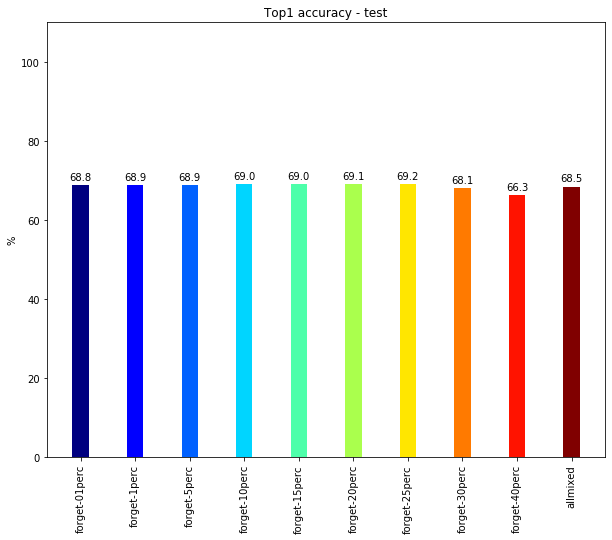

In [5]:
topn(fe, n=1, figsize=(10, 8), font =10, save = False, png_path = savepath)


## LIKELIHOODS for the CLASSES

### 0.01% removed

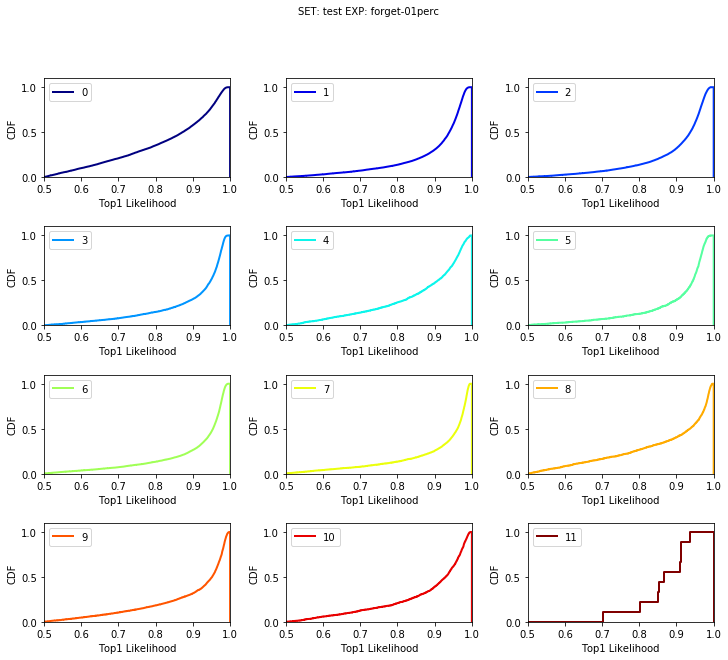

In [6]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-01perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 1% removed

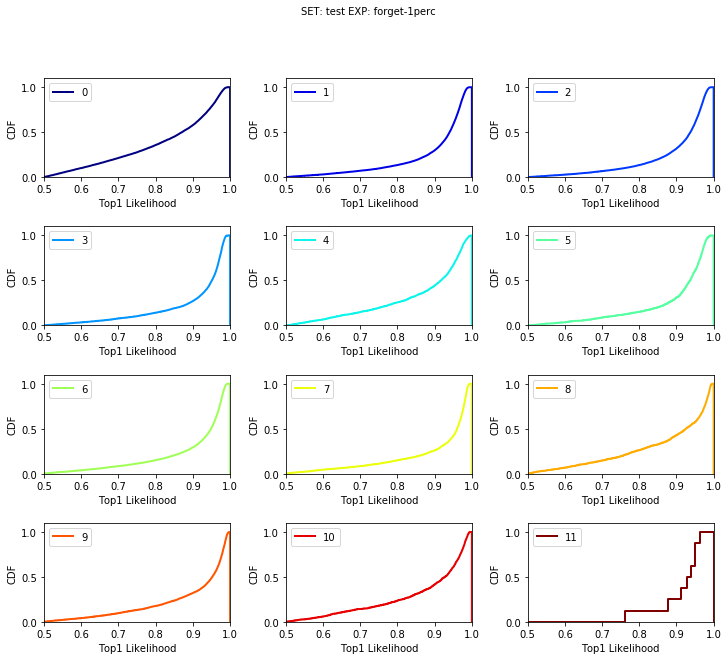

In [13]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-1perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 5% removed

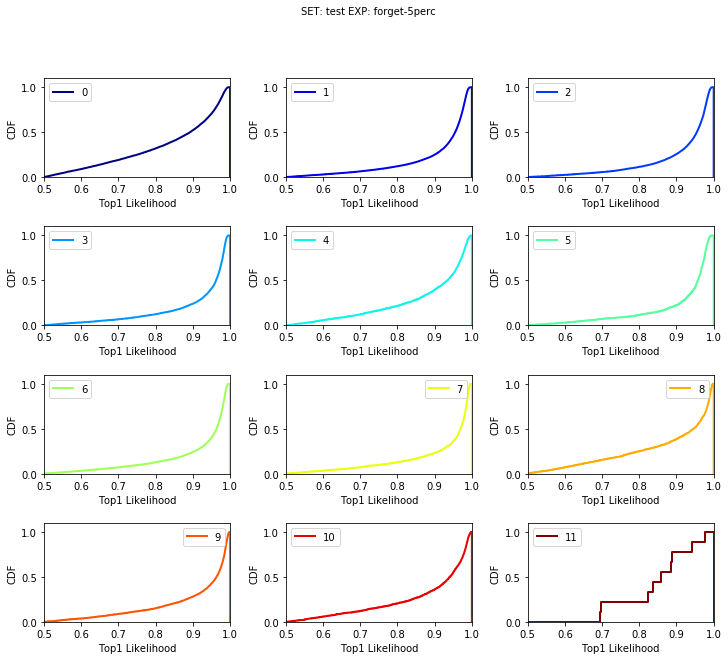

In [14]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-5perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 10% removed

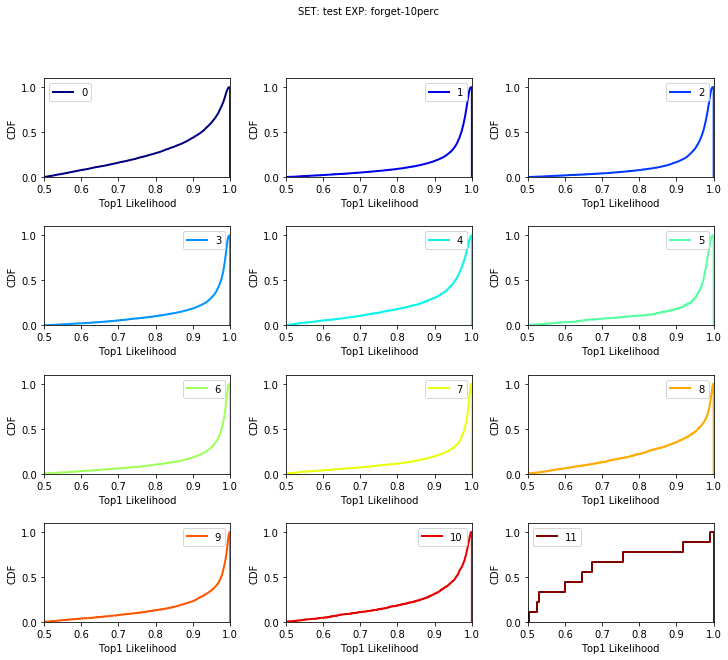

In [15]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-10perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 15% removed

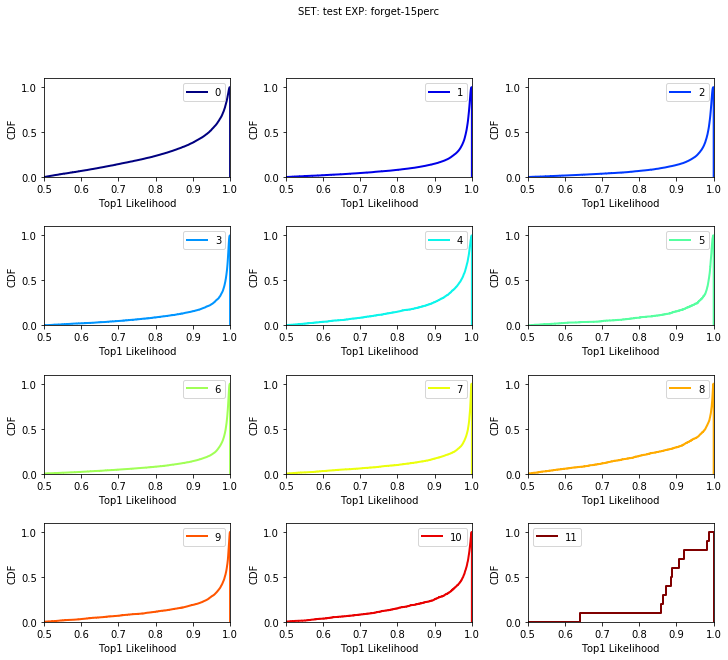

In [16]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-15perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 20% removed

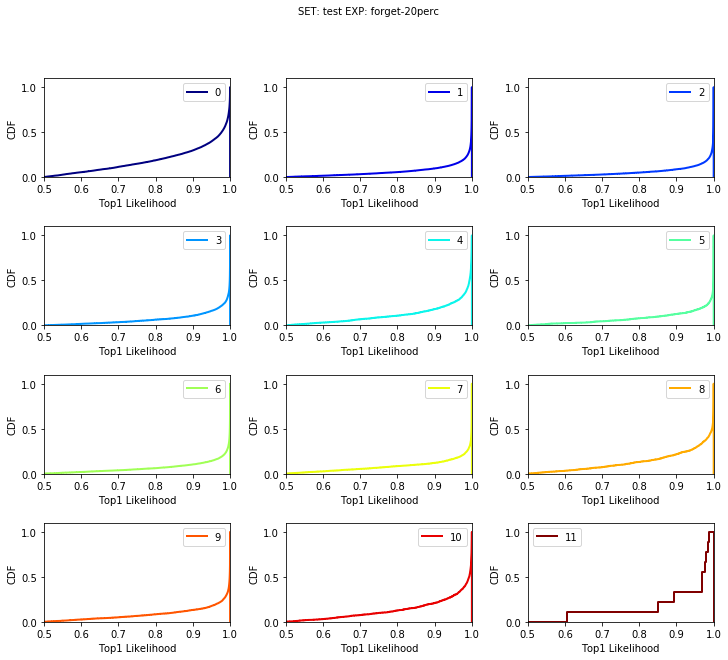

In [17]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-20perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 25% removed

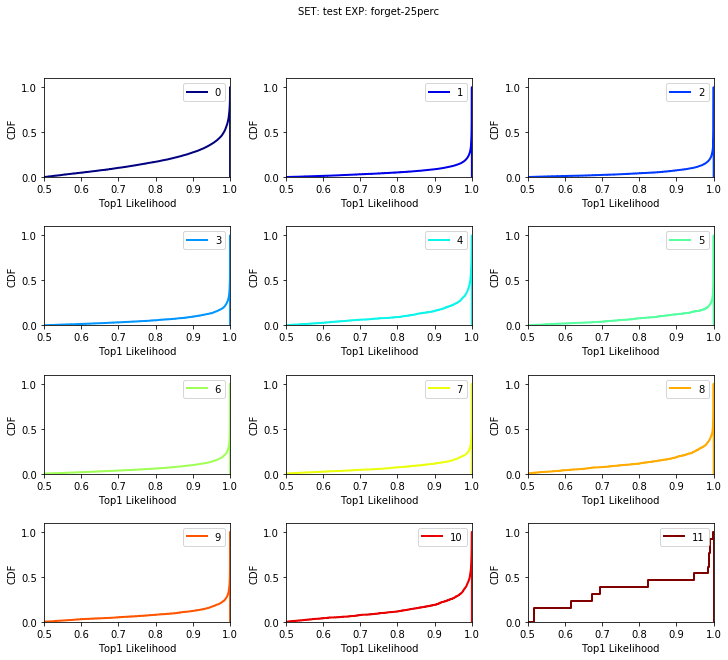

In [18]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-25perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 30% removed

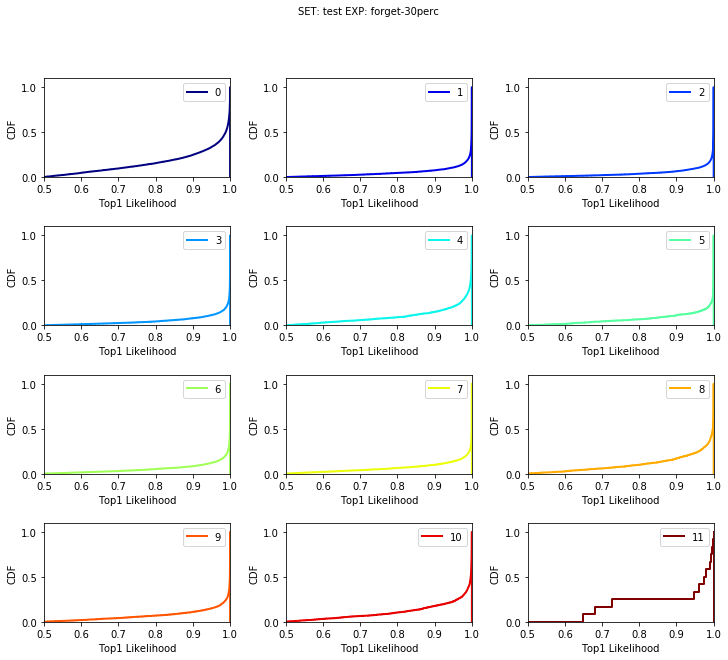

In [19]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-30perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


### 40% removed

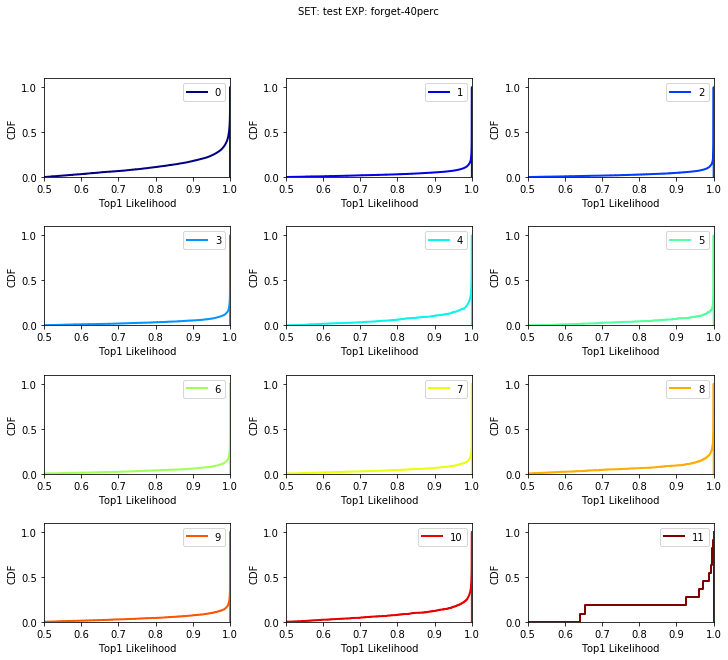

In [20]:
# cumulative distributions
likelihoods_cdf_allclasses(fe, 'forget-40perc', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)


## TOP 1 accuracy by class

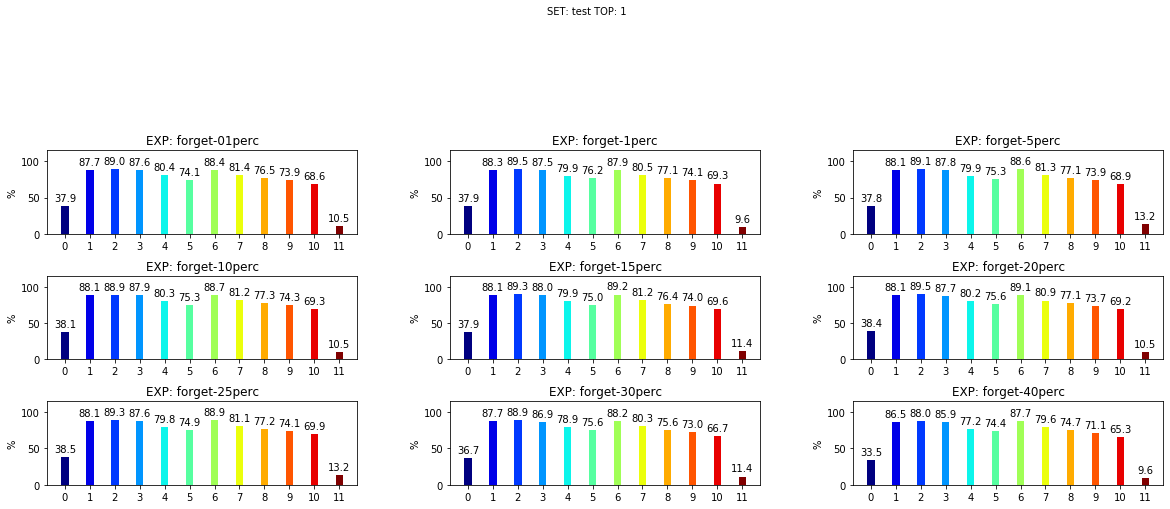

In [29]:
topn_byclass(fe, n=1,save=False, png_path='', figsize=(20, 20), \
                          vert_off=(0,3), font=10, ylimit=115.0, n_classes=12, hspace=0.5, wspace=0.3 )


## CUMULATIVE JSD


### 12 superclasses

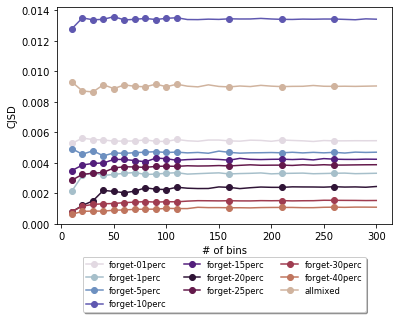

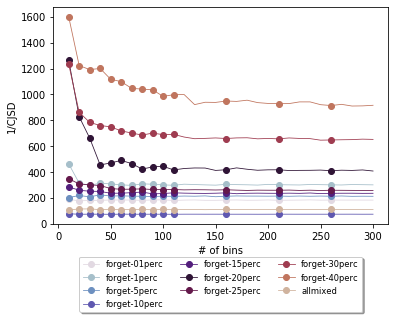

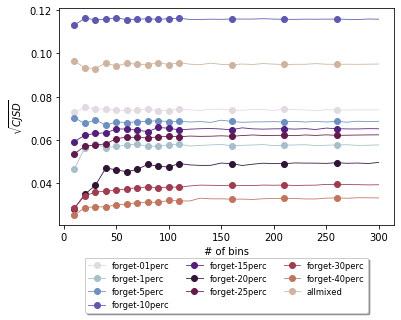

In [5]:
CJSD_vs_bins(fe, n=1, save=True, png_path=savepath, figsize=(6, 5), font=8,
             ylimit=1.0, superclasses=range(12), x_min = 0.5, bins_range = range(10,310,10))


### no class 11

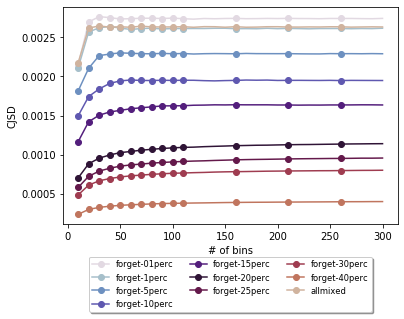

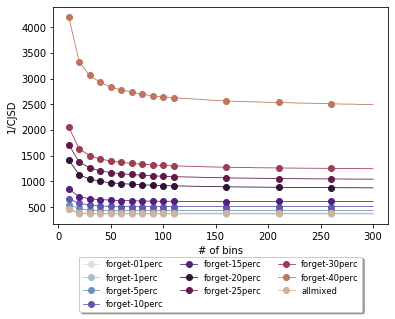

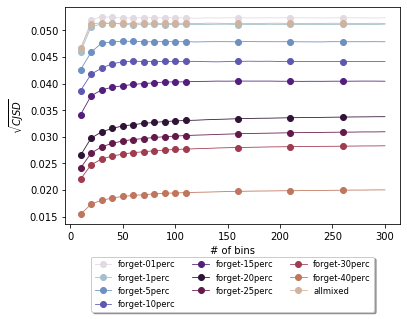

In [7]:
CJSD_vs_bins(fe, n=1, save=True, png_path=savepath, figsize=(6, 5), font=8,
             ylimit=1.0, superclasses=range(11), x_min = 0.5, bins_range = range(10,310,10))